# Loan Amount Prediction Using Artificial Neural Network

# Problem Statement 1:

To predict if the customer is eligible for loan or not. Looked on to various factors like gender,education,propertyarea, etc.to predict the loan eligibility of the customer using ANN.

# Collecting Data

# Training Set

Reading in the training_set(1).csv file into a pandas dataframe in order to train the data.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A = pd.read_csv("E:/desktop/training_set(1).csv")

In [2]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#number of rows and columns
A.shape

(614, 13)

# Inspect missing data

In [4]:
#number of missing values in each column
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

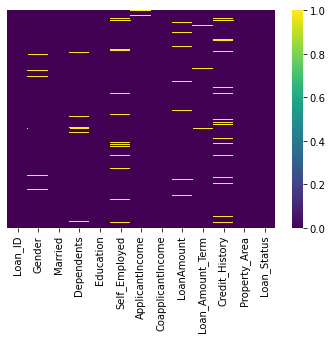

In [5]:
#To analyze them visually, use seaborn to create a simple heatmap to see where is the data missing.
import seaborn as sb
sb.heatmap(A.isnull(), yticklabels = False , cmap = "viridis")

In [6]:
from ANN_modules import catconsep,replacer,preprocessing

# Define X and Y

In [7]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# Convert Y in LabelEncoded format

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y1 = pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

In [9]:
Y1

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [10]:
cat,con = catconsep(X)

In [11]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [12]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Preprocessing(missing data treatment, standardization, OHE)

In [13]:
replacer(X)

In [14]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
X1 = preprocessing(X)

In [16]:
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,7.265121e-02,-0.554368,-0.000025,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-1.387472e-07,-0.038610,-0.219272,0.279851,0.452152,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-3.940959e-01,-0.554368,-0.957640,0.279851,0.452152,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-4.624124e-01,0.252103,-0.314546,0.279851,0.452152,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,9.738930e-02,-0.554368,-0.064453,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# Create a neural network

In [17]:
from keras.layers import Dense
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(32,activation="relu",input_dim = X1.shape[1])) # Input Layer
nn.add(Dense(32,activation="relu")) # Hidden Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(X1,Y1,validation_split=0.2,epochs=30)

Epoch 1/30
16/16 [==============================] - 1s 16ms/step - loss: 0.6991 - accuracy: 0.5295 - val_loss: 0.6238 - val_accuracy: 0.7154
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5963 - accuracy: 0.7637 - val_loss: 0.5597 - val_accuracy: 0.7967
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.7882 - val_loss: 0.5172 - val_accuracy: 0.8130
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.7984 - val_loss: 0.4925 - val_accuracy: 0.8211
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.8065 - val_loss: 0.4771 - val_accuracy: 0.8211
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.8024 - val_loss: 0.4715 - val_accuracy: 0.8211
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8045 - val_loss: 0.4683 - val_accuracy: 0.8211
Epoch 8/30
16/16 [=

In [18]:
X1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [19]:
X1.shape

(614, 20)

In [20]:
614*0.8

491.20000000000005

In [21]:
614-491

123

In [22]:
nn = Sequential()
nn.add(Dense(32,activation="relu",input_dim = X1.shape[1])) # Input Layer
nn.add(Dense(32,activation="relu")) # Hidden Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(X1,Y1,validation_split=0.2,epochs=100,batch_size=100)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.6132 - accuracy: 0.6782 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5768 - accuracy: 0.7006 - val_loss: 0.6068 - val_accuracy: 0.6748
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5558 - accuracy: 0.7230 - val_loss: 0.5922 - val_accuracy: 0.6911
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5386 - accuracy: 0.7434 - val_loss: 0.5788 - val_accuracy: 0.7561
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5241 - accuracy: 0.7719 - val_loss: 0.5674 - val_accuracy: 0.7724
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5112 - accuracy: 0.7902 - val_loss: 0.5583 - val_accuracy: 0.7805
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5004 - accuracy: 0.7943 - val_loss: 0.5503 - val_accuracy: 0.7886
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 16ms/step - loss: 0.3877 - accuracy: 0.8248 - val_loss: 0.5377 - val_accuracy: 0.7886
Epoch 60/100
5/5 [==============================] - 0s 15ms/step - loss: 0.3882 - accuracy: 0.8248 - val_loss: 0.5371 - val_accuracy: 0.7967
Epoch 61/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3861 - accuracy: 0.8248 - val_loss: 0.5376 - val_accuracy: 0.7967
Epoch 62/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3863 - accuracy: 0.8248 - val_loss: 0.5368 - val_accuracy: 0.8049
Epoch 63/100
5/5 [==============================] - 0s 13ms/step - loss: 0.3858 - accuracy: 0.8269 - val_loss: 0.5376 - val_accuracy: 0.8049
Epoch 64/100
5/5 [==============================] - 0s 13ms/step - loss: 0.3825 - accuracy: 0.8248 - val_loss: 0.5386 - val_accuracy: 0.8130
Epoch 65/100
5/5 [==============================] - 0s 14ms/step - loss: 0.3823 - accuracy: 0.8289 - val_loss: 0.5400 - val_accuracy: 0.8049
Epoch 66/100
5/5 [========

# Testing Set

Prediction is made on Testing Dataset(if the person is eligible or not eligible for loan)

In [23]:
B = pd.read_csv("E:/desktop/testing_set(1).csv")

In [24]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
#number of rows and columns
B.shape

(367, 12)

# Inspecting Missing Data

In [26]:
xtest = B.drop(labels=["Loan_ID"],axis=1)

In [27]:
replacer(xtest)

In [28]:
xtest.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Preprocessing the data

In [29]:
xtest = preprocessing(xtest)

In [30]:
xtest

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429367,0.270602,0.478189,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270602,0.478189,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180808,0.270602,0.478189,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270602,0.011519,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270602,0.478189,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380076,0.270602,0.478189,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270602,0.478189,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270602,0.011519,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359290,0.270602,0.478189,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [31]:
nn.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x000001EA1271EA60>>

In [32]:
#dir(nn)

In [33]:
nn.predict(xtest)

array([[0.810995  ],
       [0.7414251 ],
       [0.78493536],
       [0.8086084 ],
       [0.56409717],
       [0.7618154 ],
       [0.5022324 ],
       [0.02510074],
       [0.98562324],
       [0.92962825],
       [0.5433484 ],
       [0.8185265 ],
       [0.722813  ],
       [0.20027152],
       [0.8496371 ],
       [0.6644683 ],
       [0.7099944 ],
       [0.96730536],
       [0.27828324],
       [0.9817016 ],
       [0.80445427],
       [0.49880582],
       [0.67445606],
       [0.7606366 ],
       [0.29671097],
       [0.4067801 ],
       [0.7132381 ],
       [0.36035126],
       [0.96423006],
       [0.9609906 ],
       [0.860838  ],
       [0.84828216],
       [0.93239444],
       [0.76814437],
       [0.88317055],
       [0.07970339],
       [0.9793937 ],
       [0.9154418 ],
       [0.792395  ],
       [0.76537335],
       [0.85440314],
       [0.82331514],
       [0.9488871 ],
       [0.8720615 ],
       [0.8696641 ],
       [0.7083778 ],
       [0.6896394 ],
       [0.931

In [34]:
w = []

In [35]:
for i in nn.predict(xtest):
    if(i < 0.5):
        w.append("Y")
    else:
        w.append("N")

In [36]:
w

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y'

In [37]:
B["predicted_loan_status"] = w

In [38]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predicted_loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,N
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,N
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,N
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,N
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,N
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,N
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N


Hence,we have predicted the loan status of the customer.

# Problem Statement 2:

To Predict Loan Amount for Rejected ones

# Data preparation

In [39]:
replacer(A)

In [40]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# For this problem statement we are taking Training Set and Testing Set data in which the actual and predicted loan status is "YES"

In [41]:
A1 = A[A.Loan_Status == "Y"]

In [43]:
A2 = B[B.predicted_loan_status == "Y"]

In [44]:
A1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Evaluating the same column name to both the datasets. Both will have the column name as "Loan_Status"

In [45]:
A2.columns = A1.columns

In [46]:
#merging the dataset
C = pd.concat([A1,A2])

In [47]:
#indexing done to avoid errors due to imbalance index
C.index

Int64Index([  0,   2,   3,   4,   5,   6,   8,  10,  11,  12,
            ...
            297, 301, 316, 317, 318, 339, 342, 344, 346, 354],
           dtype='int64', length=503)

In [48]:
C.shape

(503, 13)

In [50]:
C.index = range(0,503,1)

In [51]:
C.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.41,360.0,1.0,Urban,Y
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.00,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.00,360.0,1.0,Urban,Y


# Preprocessing

In [52]:
X = C.drop(labels=["LoanAmount","Loan_ID"],axis=1)
replacer(X)
Y = C[["LoanAmount"]]
replacer(Y)

In [53]:
X1 = preprocessing(X)

In [54]:
Y.isna().sum()

LoanAmount    0
dtype: int64

# Create Neural Network

In [55]:
from tensorflow.keras.losses import MAE,mean_absolute_error
from keras.layers import Dense
from keras.models import Sequential
nn1 = Sequential()
nn1.add(Dense(32,activation="relu",input_dim = X1.shape[1])) # Input Layer
nn1.add(Dense(32,activation="relu")) # Hidden Layer
nn1.add(Dense(1)) # Output Layer
nn1.compile(loss = "mean_squared_error")
nn1.fit(X1,Y,validation_split=0.2,epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 16ms/step - loss: 27241.9473 - val_loss: 28791.0488
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 26902.4102 - val_loss: 28352.5859
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 26512.3438 - val_loss: 27875.0723
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 26006.0566 - val_loss: 27231.7441
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 25342.7812 - val_loss: 26479.0000
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 24551.1113 - val_loss: 25608.3594
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 23612.2363 - val_loss: 24625.2812
Epoch 8/30
13/13 [==============================] - 0s 5ms/step - loss: 22533.8711 - val_loss: 23509.3965
Epoch 9/30
13/13 [==============================] - 0s 5ms/step - loss: 21307.9277 - val_loss: 22242.5195
Epoch 10/30
13/13 [==========================

# Prepare Data for prediction

In [57]:
B1 = B[B.predicted_loan_status == "N"]
replacer(B1)

In [58]:
newX = B1.drop(labels=["Loan_ID","LoanAmount"],axis=1)

In [59]:
newX.columns = X.columns

In [60]:
newX.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
newX.index = range(0,286,1)

In [63]:
Xpred = preprocessing(newX)

In [64]:
Xpred.columns=X1.columns

# Predictions

In [65]:
pred = nn1.predict(Xpred)

In [66]:
pred

array([[145.06424 ],
       [140.13165 ],
       [154.80466 ],
       [142.86453 ],
       [116.67124 ],
       [139.65349 ],
       [103.32762 ],
       [183.99637 ],
       [120.19893 ],
       [115.750275],
       [133.66516 ],
       [119.75334 ],
       [123.572205],
       [140.04926 ],
       [157.64934 ],
       [137.15977 ],
       [118.81813 ],
       [124.85228 ],
       [129.08215 ],
       [112.22502 ],
       [147.57428 ],
       [135.3246  ],
       [122.95816 ],
       [103.09563 ],
       [156.90927 ],
       [131.12842 ],
       [141.94144 ],
       [136.472   ],
       [165.54886 ],
       [146.98495 ],
       [146.17267 ],
       [136.28653 ],
       [148.26714 ],
       [120.88238 ],
       [121.95702 ],
       [152.08136 ],
       [120.99191 ],
       [152.2325  ],
       [133.9538  ],
       [117.73135 ],
       [157.49998 ],
       [156.4528  ],
       [137.64064 ],
       [128.28577 ],
       [147.52971 ],
       [135.09238 ],
       [140.56161 ],
       [116.5

# Hence,we predicted the loan amount